In [67]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
#set # if nax rows and columns to show
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [69]:
#reading csv file from link
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
#df.head()

In [70]:
chiefs = df['chief'].unique()


In [71]:
x = 0
for chief in chiefs:
    print(chief)
    df.loc[df['chief'] == chief, 'chief_term'] = x
    #dfcoyp['chief_term'] = x
    x = x + 1

Vinson
Warren
Burger
Rehnquist
Roberts


partywinning
is disposition direction
Declaration uncon
case disposition
Vote unclear
isdecisiondirection
issuearea
decisiondirectiondissent
lawsupp
case source

In [80]:
df.dtypes.value_counts()

float64    33
object     15
int64       6
Name: count, dtype: int64

In [81]:
object_columns = df.select_dtypes(include=['object']).columns

In [85]:
X=df[[#"term",
#"petitioner",
#"respondent",
#"adminAction",
#"caseOrigin",
#"caseSource",
#"lcDisagreement",
#"lcDispositionDirection",
#"declarationUncon",
#"caseDispositionUnusual",
#"caseDisposition",
#"precedentAlteration",
#"voteUnclear",
#"issue",
#"issueArea",
#"decisionDirection",
#"decisionDirectionDissent",
#"authorityDecision1",
#"lawSupp",
#"majOpinWriter",
#"majOpinAssigner",
"decisionDirection",
"decisionType",
"threeJudgeFdc",
"certReason",
"lcDisposition",
#"partyWinning",
"majVotes",
"chief_term",
"decisionType",
"minVotes",
"caseDisposition"
]]

In [86]:
y=df[["partyWinning"]]

In [87]:
#X = df.drop(columns=y)

In [88]:
y.isna().sum()

partyWinning    21
dtype: int64

In [89]:
#y_reshaped = y.reshape(-1, 1)

In [90]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='constant', fill_value=2)
#caseDisposition = df[['caseDisposition']]
y_imputed = pd.DataFrame(imputer.fit_transform(y))
print(y_imputed)

         0
0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
13849  0.0
13850  0.0
13851  1.0
13852  1.0
13853  1.0

[13854 rows x 1 columns]


In [91]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print(X_imputed)

       decisionDirection  decisionType  threeJudgeFdc  certReason  \
0                    2.0           1.0            0.0        11.0   
1                    1.0           1.0            0.0         4.0   
2                    1.0           1.0            0.0         4.0   
3                    1.0           1.0            0.0         4.0   
4                    1.0           1.0            0.0         4.0   
...                  ...           ...            ...         ...   
13849                2.0           1.0            0.0         2.0   
13850                2.0           1.0            0.0         2.0   
13851                1.0           1.0            0.0        12.0   
13852                1.0           2.0            0.0        12.0   
13853                1.0           1.0            0.0        12.0   

       lcDisposition  majVotes  chief_term  decisionType  minVotes  \
0                2.0       8.0         0.0           1.0       1.0   
1                2.0       6.0 

In [92]:
X_imputed

,decisionDirection,decisionType,threeJudgeFdc,certReason,lcDisposition,majVotes,chief_term,decisionType,minVotes,caseDisposition
0,2.0,1.0,0.0,11.0,2.0,8.0,0.0,1.0,1.0,3.0
1,1.0,1.0,0.0,4.0,2.0,6.0,0.0,1.0,3.0,2.0
2,1.0,1.0,0.0,4.0,2.0,6.0,0.0,1.0,3.0,2.0
3,1.0,1.0,0.0,4.0,2.0,6.0,0.0,1.0,3.0,2.0
4,1.0,1.0,0.0,4.0,2.0,6.0,0.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
13849,2.0,1.0,0.0,2.0,3.0,6.0,4.0,1.0,3.0,2.0
13850,2.0,1.0,0.0,2.0,3.0,6.0,4.0,1.0,3.0,2.0
13851,1.0,1.0,0.0,12.0,2.0,9.0,4.0,1.0,0.0,3.0
13852,1.0,2.0,0.0,12.0,2.0,9.0,4.0,2.0,0.0,4.0


Remove any columns that are not useful
use PCA model - compressing the data


In [94]:
#creating instance of OneHotEncoder to convert objects to integers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')

In [96]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
ohe_X_imputed = ohe.fit_transform(X_imputed)

#X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
ohe_X_imputed

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [97]:
len(X_imputed)

13854

In [98]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, random_state=42)

In [99]:
# Create the KNN model with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [100]:
#using score function to find training and testing score
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f"Train/Test Score: {train_score:.3f}/{test_score:.3f}")

Train/Test Score: 0.947/0.933


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 0.982/0.930


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 11, Train/Test Score: 0.944/0.931


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 21, Train/Test Score: 0.942/0.936


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 31, Train/Test Score: 0.939/0.935


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 41, Train/Test Score: 0.938/0.936


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 51, Train/Test Score: 0.936/0.933


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 61, Train/Test Score: 0.932/0.930


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 71, Train/Test Score: 0.931/0.925


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 81, Train/Test Score: 0.930/0.926


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 91, Train/Test Score: 0.924/0.921


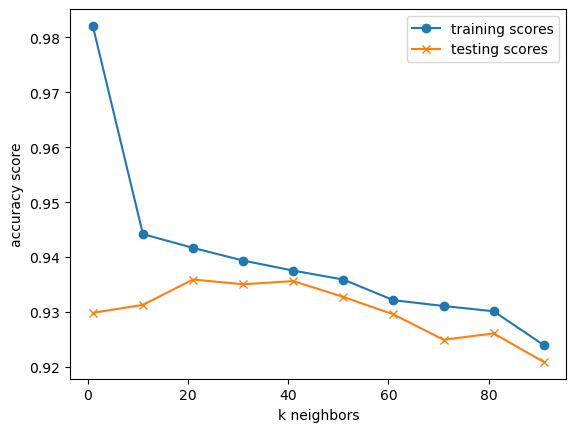

In [101]:
#importing matplotlib for creating graphs
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = [] # training_scores list to store results
test_scores = [] # testing_scores list to store results

#looping through the k in range of 1 to 30 in increments of 3
for k in range(1, 101, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 101, 10), train_scores, marker='o', label="training scores")
plt.plot(range(1, 101, 10), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [102]:
# Import the PCA module
from sklearn.decomposition import PCA

In [103]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [104]:
# Fit the PCA model on the transformed credit card DataFrame
X_imputed_transformed = pca.fit_transform(X_imputed)

# Review the first 5 rows of list data
X_imputed_transformed

array([[-3.47216834,  0.31249411],
       [ 3.49666779, -1.4013048 ],
       [ 3.49666779, -1.4013048 ],
       ...,
       [-4.48544902,  1.23506556],
       [-4.56822245,  0.57880933],
       [-4.50565585,  0.39096581]])

In [105]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.56638733, 0.11945626])

In [106]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    X_imputed_transformed,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
ccinfo_pca_df.head(20)

,PCA1,PCA2
0,-3.472168,0.312494
1,3.496668,-1.401305
2,3.496668,-1.401305
3,3.496668,-1.401305
4,3.496668,-1.401305
5,3.496668,-1.401305
6,3.496668,-1.401305
7,3.496668,-1.401305
8,3.496668,-1.401305
9,6.496559,-2.225299


In [107]:
from sklearn.cluster import KMeans

In [108]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(X_imputed_transformed)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,405833.502600
1,2,82724.435290
2,3,67425.442280
3,4,40852.331235
4,5,34350.509652


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

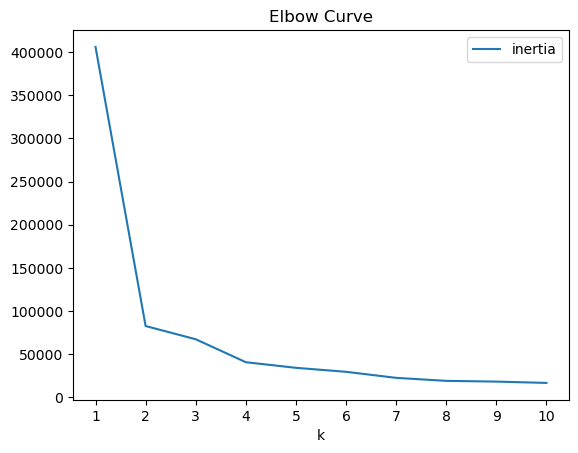

In [109]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [110]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 79.62%
Percentage decrease from k=2 to k=3: 18.49%
Percentage decrease from k=3 to k=4: 39.41%
Percentage decrease from k=4 to k=5: 15.92%
Percentage decrease from k=5 to k=6: 13.45%
Percentage decrease from k=6 to k=7: 23.53%
Percentage decrease from k=7 to k=8: 15.33%
Percentage decrease from k=8 to k=9: 4.42%
Percentage decrease from k=9 to k=10: 8.33%


In [111]:
# Define the model with 3 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=1)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_5 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_5

<Axes: xlabel='PCA1', ylabel='PCA2'>

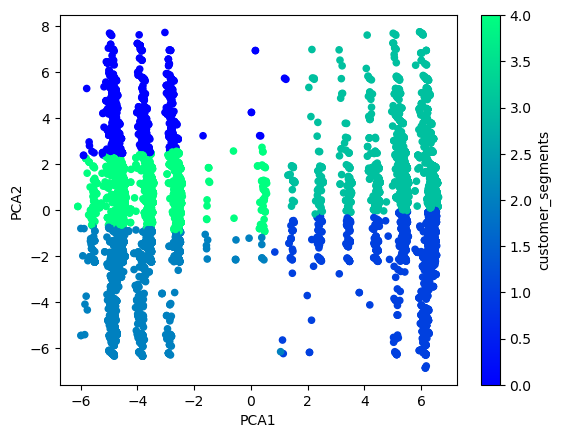

In [112]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

In [113]:
# What columns contribute the most to the explained variance?
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.56638733, 0.11945626])

In [114]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X.columns)
pca_component_weights

,PCA1,PCA2
decisionDirection,0.004649,0.016229
decisionType,-0.025673,-0.342103
threeJudgeFdc,0.022961,-0.004086
certReason,-0.997496,-0.002654
lcDisposition,-0.043311,0.638748
majVotes,0.011788,0.425154
chief_term,-0.007836,0.024339
decisionType,-0.025673,-0.342103
minVotes,-0.008419,-0.418945
caseDisposition,-0.031427,0.027950


In [115]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [116]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.7731472569778634
Testing Data Score: 0.7684757505773672


In [117]:
lr_predictions = lr_model.predict(X_test)
# Calculate the accuracy score
acc_score = accuracy_score(y_test, lr_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7684757505773672


In [119]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=128, random_state=42)

In [120]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")

Training Data Score: 0.9854667949951876
Testing Data Score: 0.9546766743648961


In [121]:
rf_predictions = rf_model.predict(X_test)
# Calculate the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9546766743648961


In [122]:
from sklearn import tree

In [123]:
dt_model = tree.DecisionTreeClassifier()

In [124]:
d_model = dt_model.fit(X_train, y_train)

In [125]:
# Making predictions using the testing data
dt_predictions = d_model.predict(X_test)
acc_score = accuracy_score(y_test, dt_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9465935334872979


In [126]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, dt_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9465935334872979


In [127]:
!pip install pydotplus

In [128]:
import pydotplus
from IPython.display import Image

In [129]:
#Create DOT data
dot_data = tree.export_graphviz(
    d_model, out_file=None, feature_names=X_imputed.columns, filled=True, max_depth=30
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.857057 to fit

